In [1]:
# If needed, download python-graphviz for previewing image of decision tree.
!pip install python-graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement python-graphviz (from versions: none)
ERROR: No matching distribution found for python-graphviz


In [38]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import model_selection
import graphviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# read data
df = pd.read_csv('phishing.csv', sep=';')

print(pd.__version__)
data = pd.DataFrame()
df.head(10)

1.3.5


,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWindow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1
6,1,0,-1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,-1,1,0,-1,-1
7,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,0,-1,1,0,1,-1
8,1,0,-1,1,1,-1,1,1,-1,1,...,1,1,1,-1,1,1,1,0,1,1
9,1,1,-1,1,1,-1,-1,1,-1,1,...,1,1,1,-1,0,-1,1,0,1,-1


In [39]:
# extract explanatory variables into a data frame
x = df.loc[:, 'having_IP_Address':'Statistical_report']

# one hot encode explanatory variables
x = x.astype("object")
x = pd.get_dummies(x)

# extract response variable (class variable) into a series
y = df.loc[:, 'Result']


In [40]:
# split data to training and testing
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2)

# decision tree classification
classifier = tree.DecisionTreeClassifier(max_depth=2)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

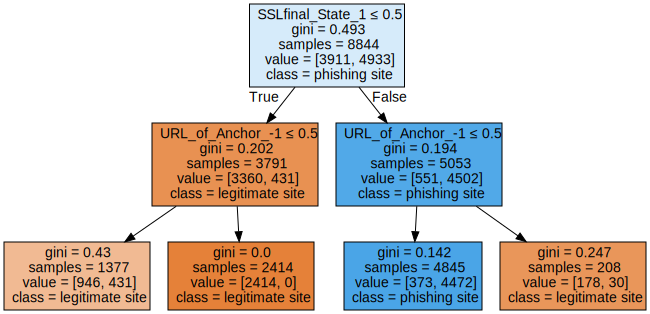

In [41]:
# visualize and show image of tree
data = tree.export_graphviz(classifier,
out_file=None,
feature_names=x.columns[:68],
class_names=['legitimate site', 'phishing site'],
filled=True,
special_characters=True)

graph = graphviz.Source(data)
graph

Instructions for internet analyst on figuring out whether site is legitimate:

Based on our decision tree if the site's SSL final state is 0 (https from untrusted vendor) or -1 (https from trusted vendor) then the site is legitimate. Also even if SSL final state is 1 (no https) the site is legitimate if the site's "URL of anchor" is -1 (less than 31% of URL consists of anchor).

However if the SSL final state is 1 (no https) and "URL of anchor" is 1 or 0 (more than 31% of URL is anchor) then the site is a phishing site.

In [42]:
# Testing the tree
prediction = classifier.predict(x_test)

print("Accuracy: ", accuracy_score(y_test, prediction))
print("Confusion matrix:\n", confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction, target_names=['legitimate site', 'phishing site']))

Accuracy:  0.9086386250565355
Confusion matrix:
 [[ 887  100]
 [ 102 1122]]
                 precision    recall  f1-score   support

legitimate site       0.90      0.90      0.90       987
  phishing site       0.92      0.92      0.92      1224

       accuracy                           0.91      2211
      macro avg       0.91      0.91      0.91      2211
   weighted avg       0.91      0.91      0.91      2211

